In [727]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import probplot

In [728]:
pd.set_option("display.max.rows",100000)
pd.set_option("display.max.columns",100)

In [729]:
data=pd.read_csv("full airplane data.csv")

In [730]:
data.head(4)

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218

In [731]:
data.shape

(13354, 11)

In [732]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Date_of_Journey  13354 non-null  object
 2   Source           13354 non-null  object
 3   Destination      13354 non-null  object
 4   Route            13353 non-null  object
 5   Dep_Time         13354 non-null  object
 6   Arrival_Time     13354 non-null  object
 7   Duration         13354 non-null  object
 8   Total_Stops      13353 non-null  object
 9   Additional_Info  13354 non-null  object
 10  Price            13354 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


## feature engineering

In [733]:
import datetime as dt

In [734]:
data["Date_of_Journey"]=pd.to_datetime(data["Date_of_Journey"]) #change to date time

In [735]:
data["Month"]=pd.DatetimeIndex(data["Date_of_Journey"]).month #taking out month frrom the date

In [736]:
data["Day"]=pd.DatetimeIndex(data["Date_of_Journey"]).day #taking out day frrom the date

In [737]:
data["Year"]=pd.DatetimeIndex(data["Date_of_Journey"]).year #taking out year frrom the date

In [738]:
data.Destination.unique() #replaceing delhi and new delhi as one and the same

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [739]:
data.Destination.replace({"Delhi":"New Delhi"},inplace=True)

In [740]:
data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [741]:
data.Source.replace({"Delhi":"New Delhi"},inplace=True) #replaceing delhi and new delhi as one and the same

In [742]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [743]:
data["Additional_Info"].unique() #checking the unique values in the data to se its relevance

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [744]:
data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  Month  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897      3   
1    05:50         13:15   7h 25m     2 stops         No info   7662      1   

   Day  Year  
0   24  2019  
1    5  2019

In [745]:
# making 3 categories in whcih a person takes the flights morning ,afternoon and night

In [746]:
def cat(x):
    a=x.split(":")[0]
    a=int(a)
    if a<12:
        return "Morning"
    elif a>=12 and a<18:
        return "Afternoon"
    else:
        return "Night"
    

In [747]:
data["Depart"]=data.Dep_Time.apply(cat)

In [748]:
#convert duraation to min

In [749]:
def min(x):
    dur=x.split()
    if len(dur)==2:
        hour=dur[0].strip("h")
        mi=dur[1].strip("m")
        tot=int(hour)*60+int(mi)
        return tot
    elif "h" in dur[0]:
        hour=dur[0].strip("h")
        tot=int(hour)*60
        return tot
    else:
        mi=dur[0].strip("m")
        tot=int(mi)
        return tot
        

        

In [750]:
data["Duration (min)"]=data.Duration.apply(min)

In [751]:
data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  Month  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897      3   
1    05:50         13:15   7h 25m     2 stops         No info   7662      1   

   Day  Year   Depart  Duration (min)  
0   24  2019    Night             170  
1    5  2019  Morning             445

### assign null vlaues

In [752]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Month              0
Day                0
Year               0
Depart             0
Duration (min)     0
dtype: int64

In [753]:
data.loc[data["Route"].isnull()] # the colum with null value

Airline Date_of_Journey     Source Destination Route Dep_Time  \
9039  Air India      2019-06-05  New Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  Month  Day  \
9039  09:25 07 May  23h 40m         NaN         No info   7480      6    5   

      Year   Depart  Duration (min)  
9039  2019  Morning            1420

In [754]:
data.loc[(data["Source"]=="New Delhi")&(data["Destination"]=="Cochin")&(data["Airline"]=="Air India")&(data["Duration"]=="23h 40m")].groupby("Total_Stops").describe()

Price                                                       \
            count          mean          std     min      25%      50%   
Total_Stops                                                              
1 stop       23.0  13800.913043  6949.457035  5117.0   7506.0  14285.0   
2 stops      17.0  13041.941176  5760.554102  7090.0  10975.0  10975.0   

                              Month                                          \
                 75%      max count      mean       std  min  25%  50%  75%   
Total_Stops                                                                   
1 stop       18334.0  25138.0  23.0  5.304348  2.687256  1.0  3.0  6.0  6.0   
2 stops      11185.0  27149.0  17.0  5.705882  2.800998  1.0  3.0  6.0  6.0   

                    Day                                                  Year  \
              max count       mean       std  min  25%  50%   75%   max count   
Total_Stops                                                                     
1 stop       12.0  23.0  10.782609  8.722784  3.0  4.0  6.0  16.5  27.0  23.0   
2 stops      12.0  17.0  12.470588  8.938104  3.0  6.0  6.0  21.0  27.0  17.0   

                                                                  \
               mean  std     min     25%     50%     75%     max   
Total_Stops                                                        
1 stop       2019.0  0.0  2019.0  2019.0  2019.0  2019.0  2019.0   
2 stops      2019.0  0.0  2019.0  2019.0  2019.0  2019.0  2019.0   

            Duration (min)                                               \
                     count    mean  std     min     25%     50%     75%   
Total_Stops                                                               
1 stop                23.0  1420.0  0.0  1420.0  1420.0  1420.0  1420.0   
2 stops               17.0  1420.0  0.0  1420.0  1420.0  1420.0  1420.0   

                     
                max  
Total_Stops          
1 stop       1420.0  
2 stops      1420.0

In [755]:
route=data.loc[(data["Source"]=="New Delhi")&(data["Destination"]=="Cochin")&(data["Airline"]=="Air India")&(data["Duration"]=="23h 40m")&(data["Total_Stops"]=="2 stops"),"Route"].unique()
stops=data.loc[(data["Source"]=="New Delhi")&(data["Destination"]=="Cochin")&(data["Airline"]=="Air India")&(data["Duration"]=="23h 40m")&(data["Total_Stops"]=="2 stops"),"Total_Stops"].unique()

In [756]:
print(route)
print(stops)


['DEL → HYD → MAA → COK']
['2 stops']


In [757]:
data.loc[data["Route"].isnull(),["Route"]]= route

In [758]:
data.loc[data["Total_Stops"].isnull(),["Total_Stops"]]=stops

In [759]:
data.iloc[9039]

Airline                        Air India
Date_of_Journey      2019-06-05 00:00:00
Source                         New Delhi
Destination                       Cochin
Route              DEL → HYD → MAA → COK
Dep_Time                           09:45
Arrival_Time                09:25 07 May
Duration                         23h 40m
Total_Stops                      2 stops
Additional_Info                  No info
Price                               7480
Month                                  6
Day                                    5
Year                                2019
Depart                           Morning
Duration (min)                      1420
Name: 9039, dtype: object

## eda

In [760]:
data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  Month  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897      3   
1    05:50         13:15   7h 25m     2 stops         No info   7662      1   

   Day  Year   Depart  Duration (min)  
0   24  2019    Night             170  
1    5  2019  Morning             445

## count of flight opearted by indivisual airlines

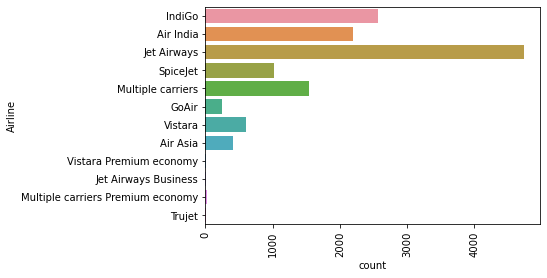

In [761]:
sns.countplot(data=data,y="Airline")
plt.xticks(rotation=90)
plt.show()

In [762]:
data.Airline.value_counts(normalize=True)*100

Jet Airways                          35.539913
IndiGo                               19.200240
Air India                            16.414557
Multiple carriers                    11.554590
SpiceJet                              7.683091
Vistara                               4.552943
Air Asia                              3.032799
GoAir                                 1.797214
Multiple carriers Premium economy     0.119814
Jet Airways Business                  0.059907
Vistara Premium economy               0.037442
Trujet                                0.007488
Name: Airline, dtype: float64

## Most people are4 using the jet airways airline followed by indigo and air india

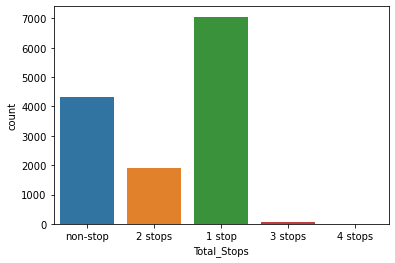

In [763]:
sns.countplot(data=data,x="Total_Stops")
plt.show()

In [764]:
data.Total_Stops.value_counts(normalize=True)*100

1 stop      52.838101
non-stop    32.499626
2 stops     14.227947
3 stops      0.419350
4 stops      0.014977
Name: Total_Stops, dtype: float64

## it shows us that most people use the airline service to trancel use the 1 stop airlines service to travel to thei destivation

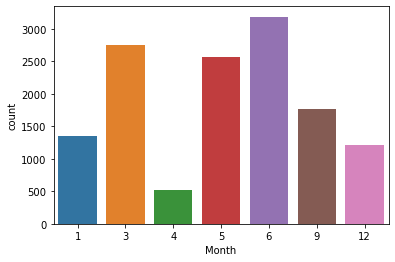

In [765]:
sns.countplot(data=data,x="Month")
plt.show()

In [766]:
data.Month.value_counts(normalize=True)*100

6     23.858020
3     20.638011
5     19.192751
9     13.246967
1     10.101842
12     9.090909
4      3.871499
Name: Month, dtype: float64

## it shows that most people travel in the 6,3 and 5th month respectively (i.e. june,march and may

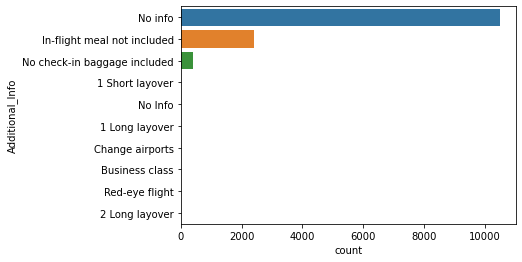

In [767]:
sns.countplot(data=data,y="Additional_Info")
plt.show()

In [768]:
data.Additional_Info.value_counts(normalize=True)

No info                         0.785757
In-flight meal not included     0.181668
No check-in baggage included    0.029654
1 Long layover                  0.001498
Change airports                 0.000599
Business class                  0.000374
No Info                         0.000225
2 Long layover                  0.000075
1 Short layover                 0.000075
Red-eye flight                  0.000075
Name: Additional_Info, dtype: float64

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


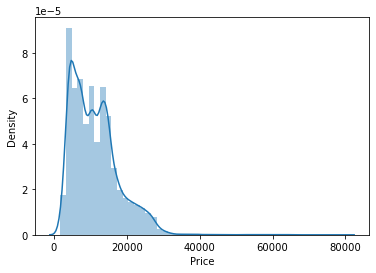

In [769]:
sns.distplot(data.Price)
plt.show()

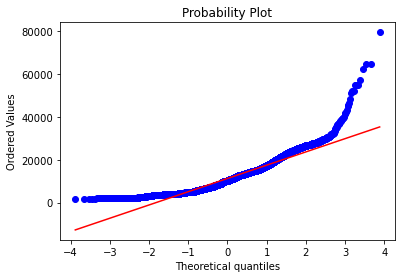

In [770]:
probplot(data["Price"],plot=plt)
plt.show()

In [771]:
data["Price"].skew()

1.2074800190721164

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


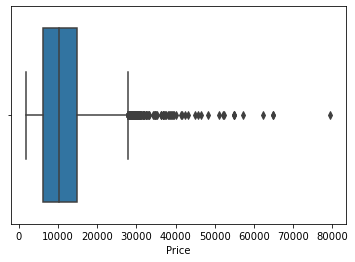

In [772]:
sns.boxplot(data["Price"])
plt.show()

## flight duration (min)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration (min)', ylabel='Density'>

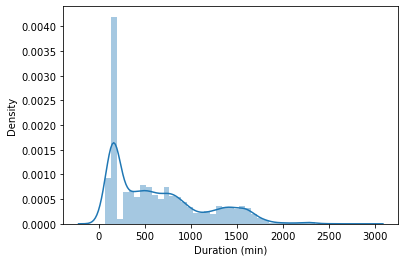

In [773]:
sns.distplot(data["Duration (min)"])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration (min)'>

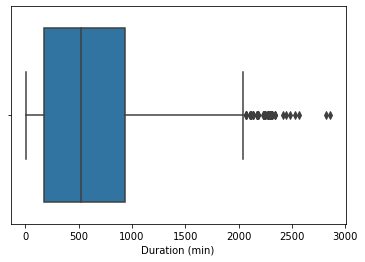

In [774]:
sns.boxplot(data["Duration (min)"])

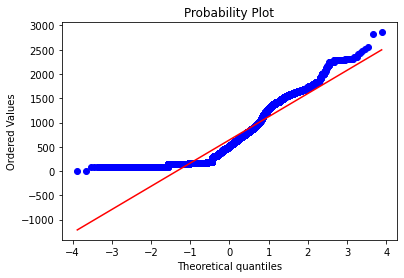

In [775]:
probplot(data["Duration (min)"],plot=plt)
plt.show()

In [776]:
data["Duration (min)"].skew()

0.8678825287039127

In [777]:
data["Duration (min)"].describe()

count    13354.00000
mean       642.42287
std        506.71504
min          5.00000
25%        175.00000
50%        520.00000
75%        930.00000
max       2860.00000
Name: Duration (min), dtype: float64

## When people like to depart

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


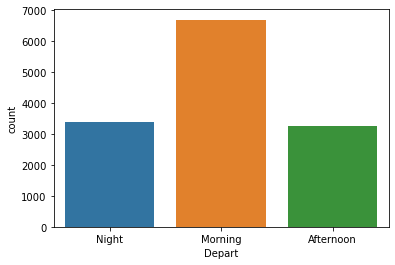

In [778]:
sns.countplot(data.Depart)
plt.show()

In [779]:
data.Depart.value_counts(normalize=True)*100

Morning      50.119814
Night        25.378164
Afternoon    24.502022
Name: Depart, dtype: float64

## The highest and lowesr prices charged by the airlines

In [780]:
data.groupby(["Airline"])["Price"].agg(["max","min"]).sort_values(by=["max"])

max    min
Airline                                        
Trujet                              4140   4140
Multiple carriers Premium economy  21665   9845
Vistara Premium economy            23579   5969
GoAir                              29858   3398
Air Asia                           30423   3383
SpiceJet                           30567   1759
Vistara                            32448   3687
Multiple carriers                  42373   5797
Air India                          45786   2050
IndiGo                             48359   2227
Jet Airways                        64881   1840
Jet Airways Business               79512  17689

## max and min prices of tickets for each airlines based on differnet stops

In [781]:
data.groupby(["Airline","Total_Stops"])["Price"].agg(["max","min"]).sort_values(by=["max","min"],ascending =(False,False))

max    min
Airline                           Total_Stops              
Jet Airways Business              1 stop       79512  27677
Jet Airways                       1 stop       64881   4757
Jet Airways Business              2 stops      52285  46490
IndiGo                            1 stop       48359   3480
Air India                         1 stop       45786   4227
Multiple carriers                 1 stop       42373   5797
Air India                         2 stops      39331   4647
Jet Airways                       2 stops      36838   6643
Multiple carriers                 2 stops      34608   5935
Vistara                           non-stop     32448   3687
Air India                         non-stop     31945   2050
Vistara                           1 stop       31127   6065
IndiGo                            non-stop     31043   2227
Jet Airways                       non-stop     30612   1840
SpiceJet                          non-stop     30567   1759
Air Asia                          1 stop       30423   5162
GoAir                             non-stop     29858   3398
SpiceJet                          1 stop       28544   4098
Air Asia                          non-stop     28318   3383
GoAir                             1 stop       26467   3673
Air Asia                          2 stops      25684   5192
IndiGo                            2 stops      24878   6103
Air India                         3 stops      24650   8607
Vistara Premium economy           non-stop     23579   5969
Multiple carriers                 3 stops      21984  14466
Multiple carriers Premium economy 1 stop       21665   9845
Air India                         4 stops      19213  17686
Jet Airways Business              non-stop     17689  17689
Trujet                            1 stop        4140   4140

### bivariate

## on the basis of source and destination

In [782]:
data.groupby(["Source","Destination"]).size().sort_values(ascending=False)

Source     Destination
New Delhi  Cochin         5682
Kolkata    Banglore       3581
Banglore   New Delhi      2752
Mumbai     Hyderabad       883
Chennai    Kolkata         456
dtype: int64

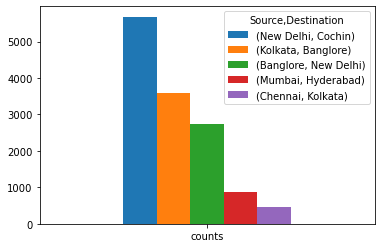

In [783]:
data.groupby(["Source","Destination"]).size().sort_values(ascending=False).to_frame().rename(columns={0:"counts"}).T.plot.bar()
plt.xticks(rotation=0)
plt.show()

In [784]:
##### most ppl go from new delhi to cochin 
##### then kolkata to banglore
##### followed by banglore to new delhi

In [785]:
data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  Month  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897      3   
1    05:50         13:15   7h 25m     2 stops         No info   7662      1   

   Day  Year   Depart  Duration (min)  
0   24  2019    Night             170  
1    5  2019  Morning             445

## which cities are visited the most in between the way of connecting flights

In [786]:
data.Route.value_counts()

DEL → BOM → COK                      3000
BLR → DEL                            1941
CCU → BOM → BLR                      1232
CCU → BLR                             896
BOM → HYD                             785
CCU → DEL → BLR                       689
BLR → BOM → DEL                       509
MAA → CCU                             456
DEL → HYD → COK                       411
DEL → JAI → BOM → COK                 314
DEL → BLR → COK                       287
DEL → COK                             262
DEL → AMD → BOM → COK                 246
DEL → MAA → COK                       190
DEL → IDR → BOM → COK                 117
DEL → HYD → MAA → COK                 101
DEL → NAG → BOM → COK                  83
CCU → HYD → BLR                        80
CCU → MAA → BLR                        78
DEL → GOI → BOM → COK                  73
DEL → HYD → BOM → COK                  68
CCU → BBI → BLR                        60
DEL → CCU → BOM → COK                  59
DEL → BHO → BOM → COK             

In [787]:
data.Route.str.split("→").str[1:-1].explode().str.strip().value_counts() #inside the route the places most stops are made

BOM    6268
DEL     981
HYD     735
MAA     430
AMD     371
JAI     342
BLR     294
BBI     158
IDR     143
NAG     132
GAU     119
COK     114
GOI     113
CCU      98
PNQ      88
BHO      81
LKO      72
IXR      69
JDH      56
ATQ      51
BDQ      46
VGA      39
TRV      32
UDR      27
IXB      25
RPR      23
IXC      19
IXU      15
VNS      13
GWL      13
KNU      12
HBX      11
PAT      11
DED       6
VTZ       5
STV       5
IMF       5
ISK       5
JLR       1
NDC       1
TIR       1
IXZ       1
IXA       1
Name: Route, dtype: int64

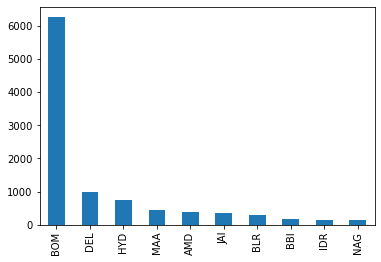

In [788]:
data.Route.str.split("→").str[1:-1].explode().str.strip().value_counts()[:10].plot.bar()
plt.show()

##### here we can see that the most stop of the  flights whoch are connecting flights are at the BOMBAY,DELHI,HYDERABAD

## percentage of flights starting from source going to  destination based on different stop counts

In [789]:
grp1=pd.DataFrame(data.groupby(["Source","Destination"])["Total_Stops"].value_counts()).rename(columns={"Total_Stops":"Count"}).reset_index()

In [790]:
grp1

Source Destination Total_Stops  Count
0    Banglore   New Delhi    non-stop   1941
1    Banglore   New Delhi      1 stop    703
2    Banglore   New Delhi     2 stops     98
3    Banglore   New Delhi     3 stops      8
4    Banglore   New Delhi     4 stops      2
5     Chennai     Kolkata    non-stop    456
6     Kolkata    Banglore      1 stop   2280
7     Kolkata    Banglore    non-stop    896
8     Kolkata    Banglore     2 stops    390
9     Kolkata    Banglore     3 stops     15
10     Mumbai   Hyderabad    non-stop    785
11     Mumbai   Hyderabad      1 stop     58
12     Mumbai   Hyderabad     2 stops     38
13     Mumbai   Hyderabad     3 stops      2
14  New Delhi      Cochin      1 stop   4015
15  New Delhi      Cochin     2 stops   1374
16  New Delhi      Cochin    non-stop    262
17  New Delhi      Cochin     3 stops     31

## we can also see that the flights starting from source only have 5 destinations asa follows:
    1.banglore - new delhi
    2.chennai - koklkata
    3.kolkata - Banglore
    4.Mumbai - Hydrabad
    5.New Delhi - Cochin

In [791]:
Src=data.Source.unique().tolist()#unique list of source


In [792]:
Src

['Banglore', 'Kolkata', 'New Delhi', 'Chennai', 'Mumbai']

## flights percentage of different soruces

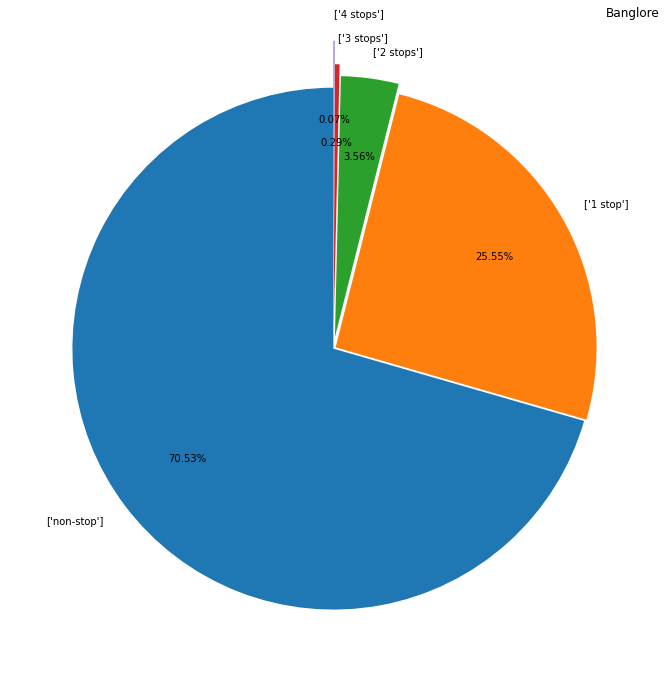

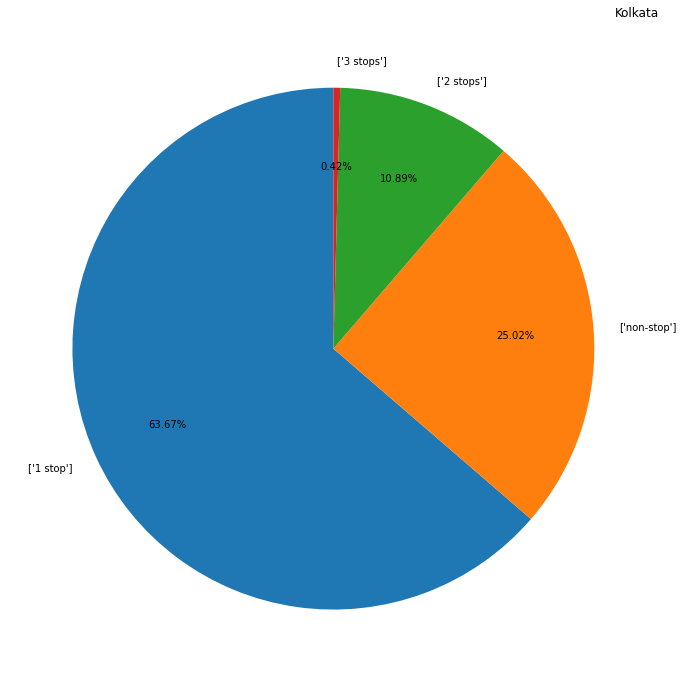

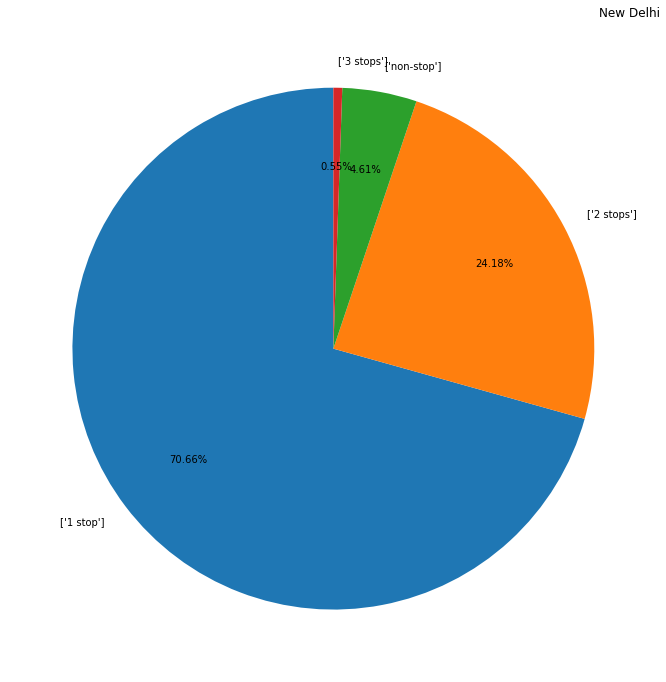

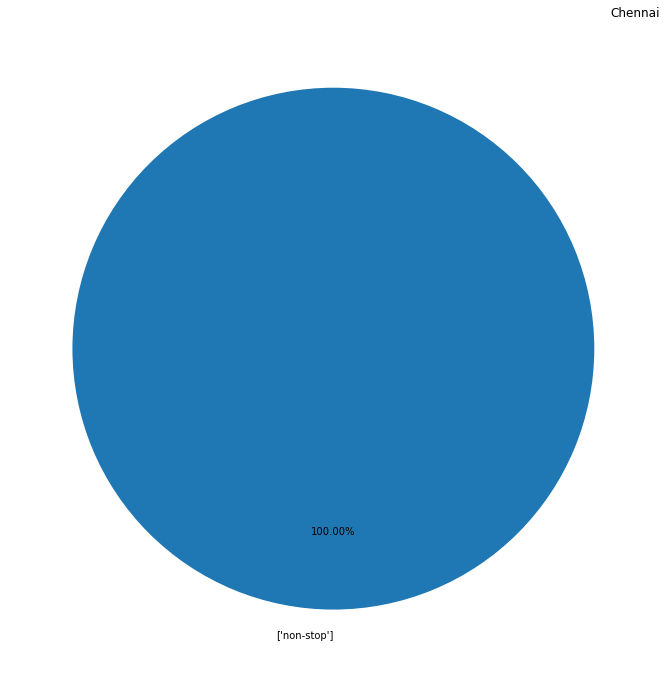

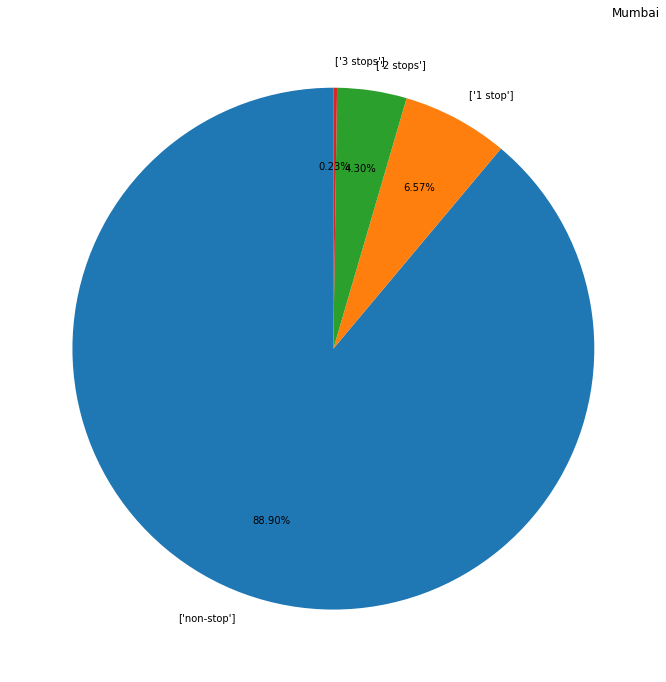

In [793]:
for i in Src:
    if i =="Banglore":
        plt.figure(figsize=(15,12))
        
        plt.pie(grp1[grp1["Source"]==i]["Count"],autopct="%1.2f%%",labels=grp1[grp1["Source"]==i][["Total_Stops"]].values,explode=[0,0.01,0.045,.09,.18],pctdistance=0.7,startangle=90)
        plt.title(i,loc="right")
        plt.show()
    else:        
        plt.figure(figsize=(15,12))
        plt.title(i,loc="right")
        plt.pie(grp1[grp1["Source"]==i]["Count"],autopct="%1.2f%%",labels=grp1[grp1["Source"]==i][["Total_Stops"]].values,pctdistance=0.7,startangle=90)
        plt.show()


## seeing the mean price from each source based on stop counts

In [794]:
pd.pivot_table(data=data,index=["Source","Destination","Total_Stops"],values=["Price"],aggfunc={"Price":"mean"}).sort_values("Price",ascending=False)

Price
Source    Destination Total_Stops              
Banglore  New Delhi   4 stops      18449.500000
Mumbai    Hyderabad   2 stops      17581.000000
                      3 stops      16276.500000
Banglore  New Delhi   2 stops      15379.642857
                      1 stop       15226.661451
Mumbai    Hyderabad   1 stop       14812.672414
Banglore  New Delhi   3 stops      14247.125000
New Delhi Cochin      2 stops      14153.709607
Kolkata   Banglore    3 stops      14129.266667
                      2 stops      13924.507692
New Delhi Cochin      3 stops      13518.000000
Kolkata   Banglore    1 stop       12429.771930
New Delhi Cochin      1 stop       12132.715816
                      non-stop      8878.072519
Banglore  New Delhi   non-stop      8413.056157
Kolkata   Banglore    non-stop      7483.255580
Mumbai    Hyderabad   non-stop      7378.717197
Chennai   Kolkata     non-stop      7207.030702

In [795]:
data[data["Destination"]=="Cochin"]

Airline Date_of_Journey     Source  \
2                            Jet Airways      2019-09-06  New Delhi   
9                      Multiple carriers      2019-05-27  New Delhi   
10                             Air India      2019-01-06  New Delhi   
15                             Air India      2019-03-03  New Delhi   
16                              SpiceJet      2019-04-15  New Delhi   
17                           Jet Airways      2019-12-06  New Delhi   
18                             Air India      2019-12-06  New Delhi   
19                           Jet Airways      2019-05-27  New Delhi   
20                                 GoAir      2019-06-03  New Delhi   
25                           Jet Airways      2019-09-06  New Delhi   
26                                IndiGo      2019-01-06  New Delhi   
27                                 GoAir      2019-05-15  New Delhi   
33                           Jet Airways      2019-06-15  New Delhi   
34                           Jet Airways      2019-05-18  New Delhi   
35                                IndiGo      2019-06-27  New Delhi   
39                           Jet Airways      2019-03-06  New Delhi   
40                     Multiple carriers      2019-05-21  New Delhi   
42                           Jet Airways      2019-05-18  New Delhi   
44                     Multiple carriers      2019-03-21  New Delhi   
49                           Jet Airways      2019-06-27  New Delhi   
50                           Jet Airways      2019-09-03  New Delhi   
58                     Multiple carriers      2019-06-05  New Delhi   
61                             Air India      2019-03-04  New Delhi   
62                     Multiple carriers      2019-03-06  New Delhi   
63                                IndiGo      2019-05-15  New Delhi   
65                                IndiGo      2019-06-24  New Delhi   
68                             Air India      2019-05-21  New Delhi   
72                     Multiple carriers      2019-06-24  New Delhi   
73                           Jet Airways      2019-06-24  New Delhi   
74                                IndiGo      2019-03-21  New Delhi   
78                           Jet Airways      2019-06-15  New Delhi   
83                                IndiGo      2019-06-27  New Delhi   
84                     Multiple carriers      2019-05-18  New Delhi   
86                                IndiGo      2019-06-24  New Delhi   
87                           Jet Airways      2019-06-06  New Delhi   
90                     Multiple carriers      2019-05-27  New Delhi   
91                     Multiple carriers      2019-06-03  New Delhi   
93                             Air India      2019-06-03  New Delhi   
99                           Jet Airways      2019-12-06  New Delhi   
102                          Jet Airways      2019-06-24  New Delhi   
105                          Jet Airways      2019-05-18  New Delhi   
106                    Multiple carriers      2019-03-27  New Delhi   
107                    Multiple carriers      2019-03-27  New Delhi   
108                            Air India      2019-09-05  New Delhi   
109                          Jet Airways      2019-05-24  New Delhi   
113                          Jet Airways      2019-06-03  New Delhi   
114                                GoAir      2019-06-27  New Delhi   
115                    Multiple carriers      2019-05-18  New Delhi   
116                            Air India      2019-06-03  New Delhi   
117                    Multiple carriers      2019-03-03  New Delhi   
119                          Jet Airways      2019-09-05  New Delhi   
123                            Air India      2019-01-03  New Delhi   
131                          Jet Airways      2019-06-15  New Delhi   
132                              Vistara      2019-12-05  New Delhi   
134                    Multiple carriers      2019-05-21  New Delhi   
135                          Jet Airways      2019-05-18 

## relation of total stops and price of those 

In [796]:
data.groupby("Total_Stops")["Price"].describe()

count          mean          std      min       25%      50%  \
Total_Stops                                                                  
1 stop       7056.0  12558.986961  5958.319387   3480.0   8099.00  11264.5   
2 stops      1900.0  14238.441053  4815.204994   4647.0  11149.50  13243.0   
3 stops        56.0  13884.410714  3442.643132   8607.0  10703.00  13375.5   
4 stops         2.0  18449.500000  1079.752055  17686.0  18067.75  18449.5   
non-stop     4340.0   7935.367051  6506.029437   1759.0   3943.00   4878.0   

                  75%      max  
Total_Stops                     
1 stop       14871.00  79512.0  
2 stops      15615.75  52285.0  
3 stops      15596.75  24650.0  
4 stops      18831.25  19213.0  
non-stop      7978.50  32448.0

## here we can see that thr price is variously being affected by the number of stops that are there so lets see dist plot of the price for the different_total stops

## Additional analysis on the price based on the different stops

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<Figure size 1080x720 with 0 Axes>

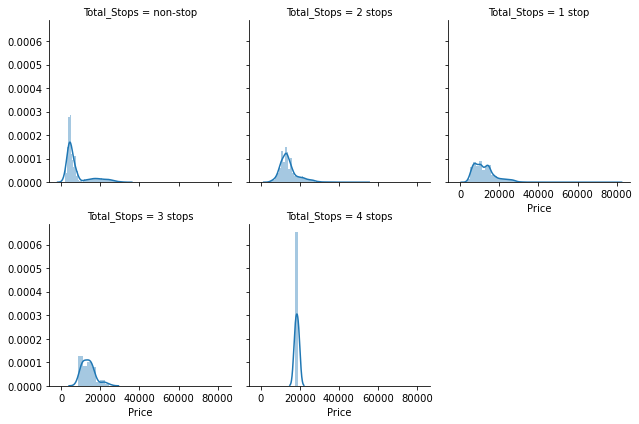

In [797]:
plt.figure(figsize=(15,10))
g=sns.FacetGrid(data,col="Total_Stops",col_wrap=3)
g.map(sns.distplot,"Price")
plt.show()

In [798]:
data.groupby("Total_Stops")["Price"].skew()

Total_Stops
1 stop      1.756093
2 stops     1.633538
3 stops     1.043906
4 stops          NaN
non-stop    1.659679
Name: Price, dtype: float64

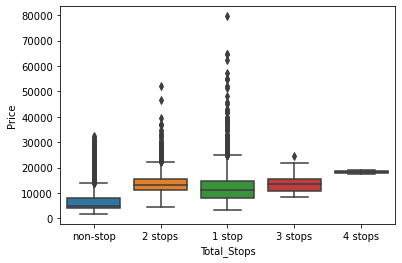

In [799]:
sns.boxplot(data=data,x="Total_Stops",y="Price")
plt.show()

## airline bringing in the highest revenue

In [800]:
data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  Month  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897      3   
1    05:50         13:15   7h 25m     2 stops         No info   7662      1   

   Day  Year   Depart  Duration (min)  
0   24  2019    Night             170  
1    5  2019  Morning             445

<Figure size 864x720 with 0 Axes>

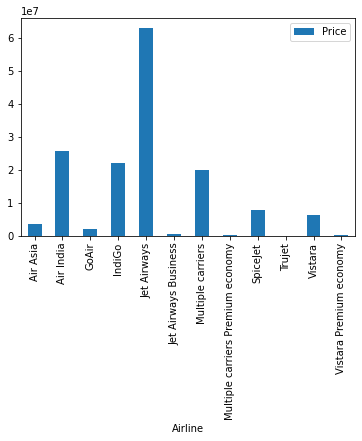

In [801]:
plt.figure(figsize=(12,10))
data.groupby("Airline")["Price"].sum().to_frame().plot(kind="bar")
plt.xticks(rotation=90)
plt.show()

## Jet airways brings in the highest revenue followed by air india nad indigo near to each other and trailing just behing it nearby is Multiple carriers

# how or order it to look better and sort it 

In [802]:
pd.pivot_table(data=data,index="Airline",values=["Price"],aggfunc={"Price":["sum","mean","count"]})

Price                          
                                    count          mean         sum
Airline                                                            
Air Asia                            405.0   8660.392593   3507459.0
Air India                          2192.0  11765.995894  25791063.0
GoAir                               240.0   8614.733333   2067536.0
IndiGo                             2564.0   8572.861934  21980818.0
Jet Airways                        4746.0  13234.278340  62809885.0
Jet Airways Business                  8.0  49439.750000    395518.0
Multiple carriers                  1543.0  12957.987686  19994175.0
Multiple carriers Premium economy    16.0  12685.437500    202967.0
SpiceJet                           1026.0   7533.142300   7729004.0
Trujet                                1.0   4140.000000      4140.0
Vistara                             608.0  10488.636513   6377091.0
Vistara Premium economy               5.0  12702.600000     63513.0

In [803]:
data.groupby("Airline")["Price"].describe()

count          mean           std  \
Airline                                                                 
Air Asia                            405.0   8660.392593   6568.346814   
Air India                          2192.0  11765.995894   5944.274754   
GoAir                               240.0   8614.733333   6457.054623   
IndiGo                             2564.0   8572.861934   6555.383636   
Jet Airways                        4746.0  13234.278340   5564.069993   
Jet Airways Business                  8.0  49439.750000  19418.966905   
Multiple carriers                  1543.0  12957.987686   5514.084476   
Multiple carriers Premium economy    16.0  12685.437500   3333.582557   
SpiceJet                           1026.0   7533.142300   6880.735392   
Trujet                                1.0   4140.000000           NaN   
Vistara                             608.0  10488.636513   6152.381872   
Vistara Premium economy               5.0  12702.600000   6659.253922   

                                       min       25%      50%      75%  \
Airline                                                                  
Air Asia                            3383.0   4409.00   5964.0  10794.0   
Air India                           2050.0   7480.00  10861.0  14431.0   
GoAir                               3398.0   4239.00   5842.0   9412.5   
IndiGo                              2227.0   4591.00   6015.0   8855.0   
Jet Airways                         1840.0  10262.00  12898.0  15129.0   
Jet Airways Business               17689.0  41786.75  52257.0  58513.5   
Multiple carriers                   5797.0   8266.00  12192.0  15419.0   
Multiple carriers Premium economy   9845.0  10161.00  11269.0  14629.0   
SpiceJet                            1759.0   3625.00   4097.0   7317.0   
Trujet                              4140.0   4140.00   4140.0   4140.0   
Vistara                             3687.0   5613.00   8610.0  12395.0   
Vistara Premium economy             5969.0   9125.00  11793.0  13047.0   

                                       max  
Airline                                     
Air Asia                           30423.0  
Air India                          45786.0  
GoAir                              29858.0  
IndiGo                             48359.0  
Jet Airways                        64881.0  
Jet Airways Business               79512.0  
Multiple carriers                  42373.0  
Multiple carriers Premium economy  21665.0  
SpiceJet                           30567.0  
Trujet                              4140.0  
Vistara                            32448.0  
Vistara Premium economy            23579.0

## stops on the basis of airplines

In [804]:
data.groupby("Total_Stops")["Airline"].count().to_frame().sort_values(by="Airline",ascending=False)

Airline
Total_Stops         
1 stop          7056
non-stop        4340
2 stops         1900
3 stops           56
4 stops            2

## Stop bifercation based on the differnt airlines and giving their counts

In [805]:
data.groupby("Total_Stops")["Airline"].value_counts().to_frame().rename(columns={"Airline":"Count"})

Count
Total_Stops Airline                                 
1 stop      Jet Airways                         3137
            Multiple carriers                   1483
            IndiGo                              1017
            Air India                            663
            Vistara                              271
            SpiceJet                             180
            Air Asia                             160
            GoAir                                123
            Multiple carriers Premium economy     16
            Jet Airways Business                   5
            Trujet                                 1
2 stops     Air India                            965
            Jet Airways                          843
            Multiple carriers                     50
            IndiGo                                26
            Air Asia                              14
            Jet Airways Business                   2
3 stops     Air India                             46
            Multiple carriers                     10
4 stops     Air India                              2
non-stop    IndiGo                              1521
            SpiceJet                             846
            Jet Airways                          766
            Air India                            516
            Vistara                              337
            Air Asia                             231
            GoAir                                117
            Vistara Premium economy                5
            Jet Airways Business                   1

## different airlines count

In [806]:
data.groupby("Airline").size().sort_values(ascending=False) #count of flights opearted by indivu=isual airlines

Airline
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
dtype: int64

## price vs airline

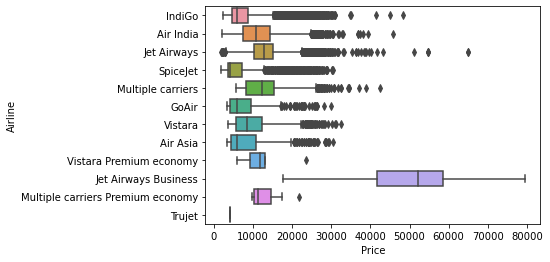

In [807]:
sns.boxplot(data=data,x="Price",y="Airline")
plt.show()

# depart vs total_Stops

In [808]:
data.groupby("Depart")["Total_Stops"].value_counts()

Depart     Total_Stops
Afternoon  1 stop         1792
           non-stop        988
           2 stops         483
           3 stops           9
Morning    1 stop         3600
           non-stop       2037
           2 stops        1007
           3 stops          47
           4 stops           2
Night      1 stop         1664
           non-stop       1315
           2 stops         410
Name: Total_Stops, dtype: int64

## depart vs durations

In [809]:
data.groupby("Depart")["Duration (min)"].mean()

Depart
Afternoon    646.926956
Morning      639.220828
Night        644.398053
Name: Duration (min), dtype: float64

# depart vs flight company

In [810]:
data.groupby("Depart")["Airline"].value_counts()

Depart     Airline                          
Afternoon  Jet Airways                          1061
           Air India                             675
           IndiGo                                638
           Multiple carriers                     368
           SpiceJet                              273
           Vistara                               164
           Air Asia                               53
           GoAir                                  37
           Multiple carriers Premium economy       1
           Trujet                                  1
           Vistara Premium economy                 1
Morning    Jet Airways                          2059
           IndiGo                               1258
           Multiple carriers                    1098
           Air India                            1077
           SpiceJet                              556
           Vistara                               280
           Air Asia                              192
 

# flight duration and flight company

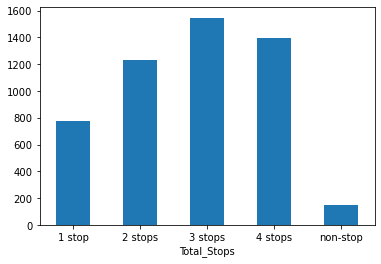

In [811]:
data.groupby("Total_Stops")["Duration (min)"].mean().plot.bar()
plt.xticks(rotation=0)
plt.show()

# fight duration vs stops

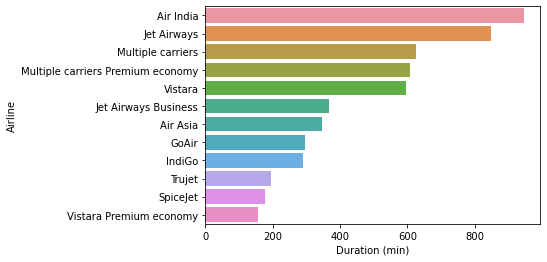

In [812]:
grp2=data.groupby("Airline")["Duration (min)"].mean().to_frame().reset_index().sort_values(by="Duration (min)",ascending=False)
sns.barplot(x="Duration (min)",y="Airline",data=grp2)
plt.show()

# price vs total stops vs depart 

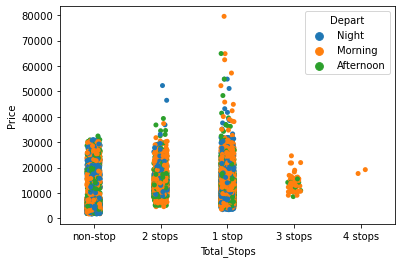

In [813]:
sns.stripplot(data=data,y="Price",x="Total_Stops",hue="Depart")
plt.show()

## pairplot

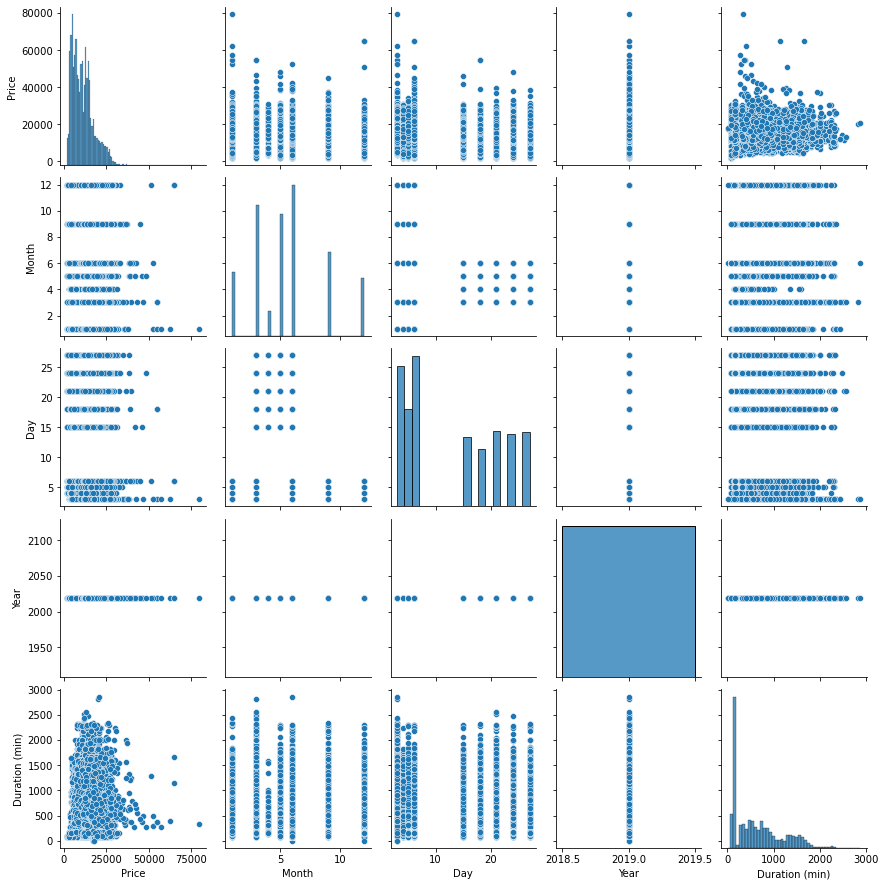

In [814]:
sns.pairplot(data)
plt.show()

# dropping columns

In [815]:
data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-01-05   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  Month  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897      3   
1    05:50         13:15   7h 25m     2 stops         No info   7662      1   

   Day  Year   Depart  Duration (min)  
0   24  2019    Night             170  
1    5  2019  Morning             445

In [816]:
data.drop("Additional_Info",axis=1,inplace=True) # remove additonal info

In [817]:
data.drop("Date_of_Journey",axis=1,inplace=True) #remove date

In [818]:
data.drop(["Route","Dep_Time","Arrival_Time","Duration"],axis=1,inplace=True)

In [819]:
data.head(2)

Airline    Source Destination Total_Stops  Price  Month  Day  Year  \
0     IndiGo  Banglore   New Delhi    non-stop   3897      3   24  2019   
1  Air India   Kolkata    Banglore     2 stops   7662      1    5  2019   

    Depart  Duration (min)  
0    Night             170  
1  Morning             445

## Feature engineering 

In [820]:
#assigning numerical values to the total_Stops columns

In [821]:
data.Total_Stops.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True) 


In [822]:
data.Depart.replace({"Morning":0,"Afternoon":1,"Night":2},inplace=True)

## label encoding

In [823]:
data.head(2)

Airline    Source Destination  Total_Stops  Price  Month  Day  Year  \
0     IndiGo  Banglore   New Delhi            0   3897      3   24  2019   
1  Air India   Kolkata    Banglore            2   7662      1    5  2019   

   Depart  Duration (min)  
0       2             170  
1       0             445

# correlation in the data

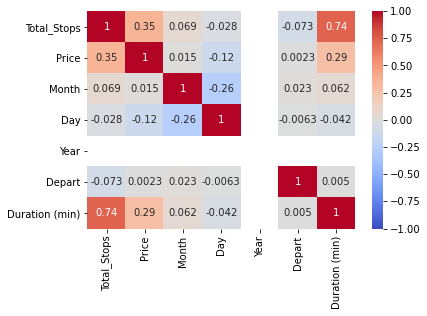

In [824]:
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap="coolwarm")
plt.show()

In [825]:
data[["Price","Depart"]].corr()

Price    Depart
Price   1.000000  0.002312
Depart  0.002312  1.000000

## Transformatiom

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

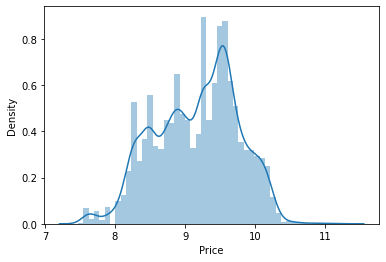

In [826]:
sns.distplot(np.log(data["Price"]))

In [827]:
np.log(data["Price"]).skew()

-0.2290424551942878

In [829]:
from scipy.stats import boxcox

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

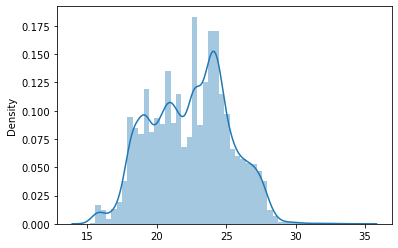

In [831]:
tgt,val=boxcox(data["Price"])
sns.distplot(tgt)

In [834]:
pd.DataFrame(tgt).skew()

0   -0.021382
dtype: float64